# NLP ASSIGNMENT 2
# e commerce website review analysis
160121733171

160121733172

160121733173

.

In [ ]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
import gensim
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

Analyzing reviews in the e-commerce and retail industry using natural language processing (NLP) models can provide valuable insights into customer opinions, preferences, and trends. Here's a general outline of how you might approach building such a model:

1. **Data Collection**: Gather a large dataset of reviews from e-commerce and retail platforms. These reviews should cover a diverse range of products and categories.
we have taken amazon reviews for analysing the data from kaggle.


In [3]:

df = pd.read_csv("C:/Users/dell/OneDrive/Desktop/ml projects/archive/amazon_reviews.csv")


In [4]:
df.head

<bound method NDFrame.head of       Unnamed: 0  reviewerName  overall  \
0              0           NaN      4.0   
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  2014-07-23       138   
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived l

In [5]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [7]:
df.nunique(axis = 0)

Unnamed: 0              4915
reviewerName            4594
overall                    5
reviewText              4912
reviewTime               690
day_diff                 690
helpful_yes               23
helpful_no                17
total_vote                26
score_pos_neg_diff        27
score_average_rating      28
wilson_lower_bound        40
dtype: int64

In [8]:
df.isnull().sum()


Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


2. **Data Preprocessing & visualiztion**:
   - Clean the text data by removing special characters, punctuation, and irrelevant information (e.g., timestamps, usernames).
   - Tokenize the text into words or subword units.
   - Normalize the text by converting to lowercase and removing stop words.
   - also removed null values from the dataset
   - using mathplot.lib plotted different graphs 



In [9]:
df = df[df['reviewerName'].notnull()]
df = df[df['reviewText'].notnull()]

In [10]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

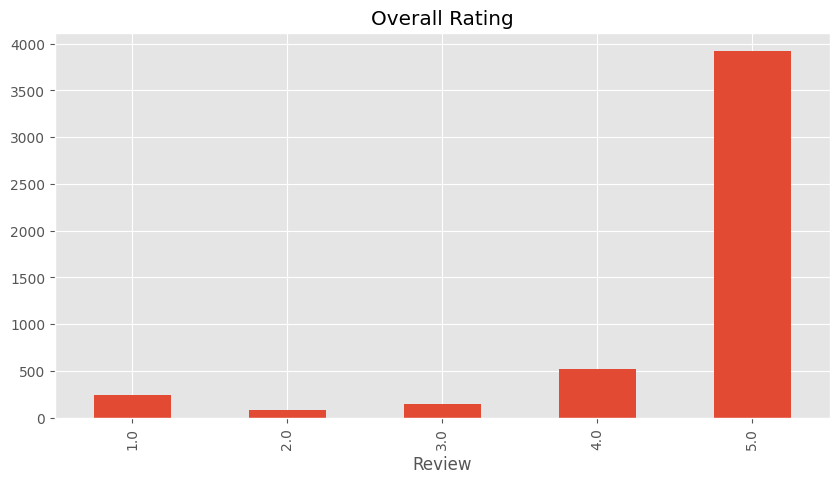

In [11]:
ad = df['overall'].value_counts().sort_index().plot(kind = 'bar', title = "Overall Rating", figsize = (10,5))
ad.set_xlabel("Review")
plt.show()

<Axes: title={'center': 'Avg. Rating'}, xlabel='score_average_rating'>

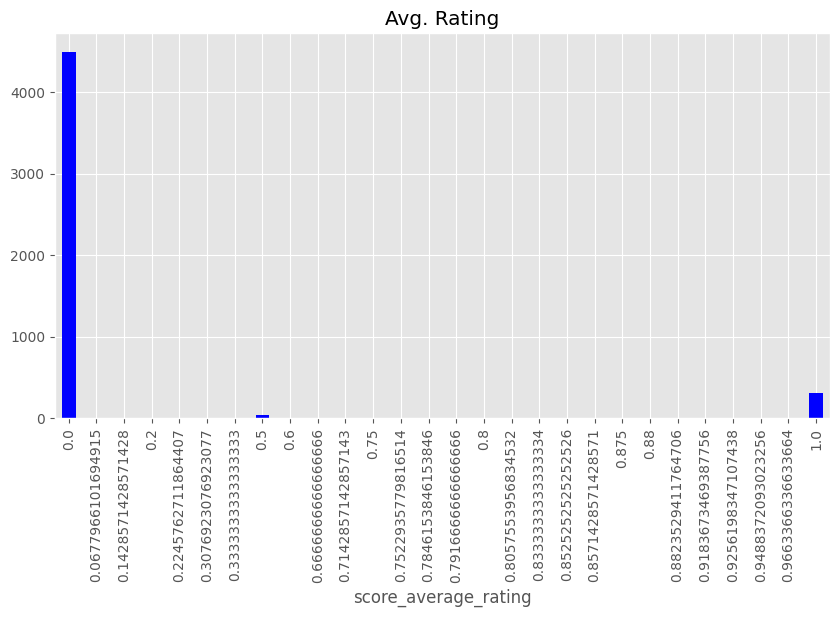

In [12]:
df['score_average_rating'].value_counts().sort_index().plot(kind = 'bar', title = "Avg. Rating", figsize = (10,5), color = 'blue')

<Axes: title={'center': 'Number of votes given to the evaluation'}, xlabel='total_vote'>

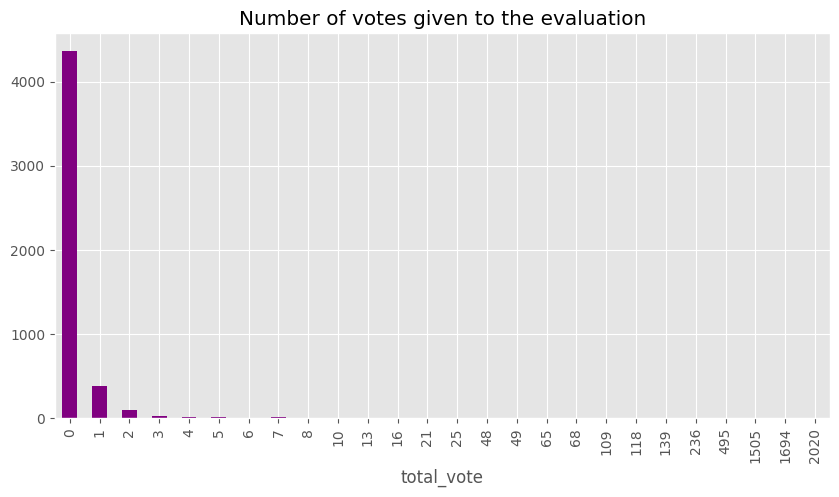

In [13]:
df['total_vote'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of votes given to the evaluation', figsize = (10,5), color = 'purple')

In [14]:
for i in df:
    if i == 'reviewText':
        df[i] = df[i].str.lower()
        df[i] = df[i].str.replace('[^\w\s]', '')
        df[i] = df[i].str.replace('\d', '')
        
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [15]:
old_name = 'Unnamed: 0'
new_name = 'ID'

df = df.rename(columns = {old_name:new_name})
df.head()


,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


# sentiment analysis

NLTK (Natural Language Toolkit): NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet. Additionally, it includes a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

SentimentIntensityAnalyzer: This is a class provided by NLTK specifically for sentiment analysis. Sentiment analysis is the process of determining the sentiment expressed in a piece of text. The SentimentIntensityAnalyzer in NLTK is based on the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, which is a pre-trained model specifically designed for sentiment analysis of social media texts. It uses a combination of lexical analysis (word-based) and rule-based methods to determine the sentiment score of a piece of text.

VADER Lexicon: VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It's particularly effective at analyzing sentiments in informal text, like social media posts, reviews, and comments. The VADER lexicon contains a list of lexical features (words and phrases) which are rated according to their sentiment polarity (positive, negative, or neutral), intensity, and context.

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
df['reviewText'][10]

'i like this sd card because it can take music video downloads, personal videos, files,docs, and multimedia images with a fast transfer rate of class 10 speed. it can take games with large files very easily and still have enough space for apps. it&#34;s great for video cameras and camcorders with the supplied adapter. fits very easily into smartphones and tablets sd card slots. i recommend this 32gb sd card to everyone.'

In [20]:
sia.polarity_scores(df['reviewText'][10])

{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258}

In [21]:
df.columns

Index(['ID', 'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['reviewText']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [23]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.075,0.925,0.000,-0.2960
2,0.077,0.923,0.000,-0.3089
3,0.000,0.909,0.091,0.7081
4,0.038,0.835,0.127,0.7087
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
4910,0.091,0.817,0.092,0.0018
4911,0.000,0.939,0.061,0.1761
4912,0.000,0.828,0.172,0.8588
4913,0.000,0.802,0.198,0.4939


In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})
vaders = vaders.merge(df, how = 'left')

In [25]:
vaders

,ID,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,4910,0.091,0.817,0.092,0.0018,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4909,4911,0.000,0.939,0.061,0.1761,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4910,4912,0.000,0.828,0.172,0.8588,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4911,4913,0.000,0.802,0.198,0.4939,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


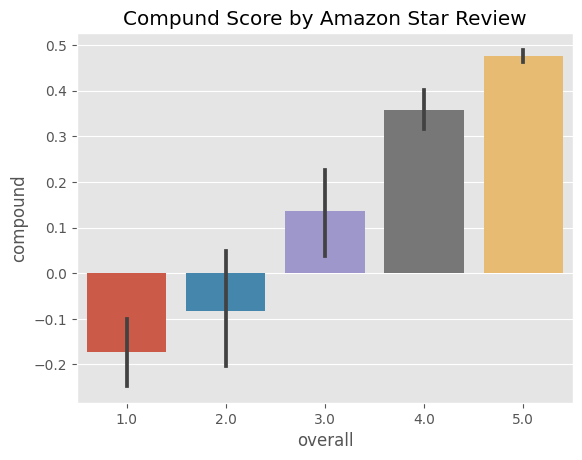

In [26]:
gph = sns.barplot(data = vaders, x = 'overall', y = 'compound')
gph.set_title('Compund Score by Amazon Star Review')
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

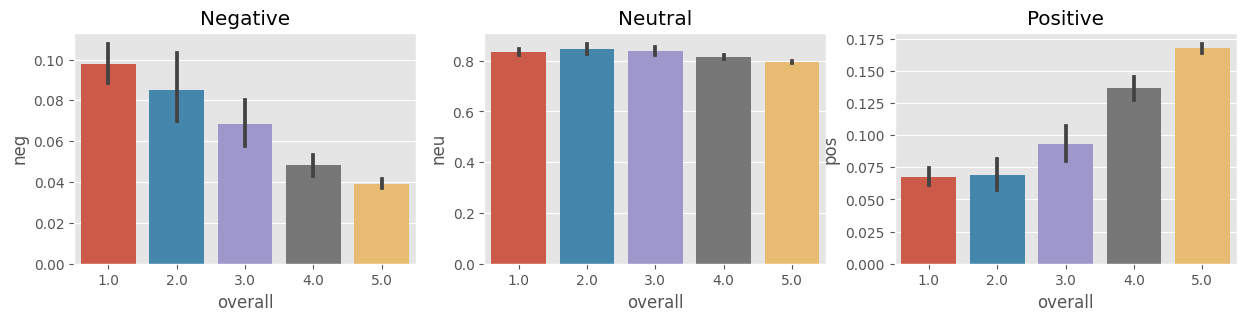

In [27]:
fig, ax = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data = vaders, x = 'overall', y = 'neg', ax = ax[0])
sns.barplot(data = vaders, x = 'overall', y = 'neu', ax = ax[1])
sns.barplot(data = vaders, x = 'overall', y = 'pos', ax = ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.show()

# pretrained model

TFAutoModelForSequenceClassification is a class provided by the Hugging Face Transformers library, specifically designed for sequence classification tasks using TensorFlow. Let's break down its components:

TFAutoModel: This indicates that it's an automatic model class for TensorFlow. Hugging Face provides various "Auto" classes for seamlessly loading pre-trained models without needing to specify the exact model class. These classes automatically determine the appropriate model architecture based on the provided model name.

ForSequenceClassification: This indicates the task for which the model is designed, which in this case is sequence classification. Sequence classification involves assigning a label to an input sequence (e.g., a sentence, a document) based on its content. In sentiment analysis, for example, the task is to classify the sentiment of a piece of text as positive, negative, or neutral.

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

Model = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = TFAutoModelForSequenceClassification.from_pretrained(Model)


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [31]:
import tensorflow as tf 
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='tf', padding=True, truncation=True)
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    scores = tf.nn.softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

# Example usage
example_text = "This is too good"
scores = polarity_scores_roberta(example_text)
print(scores)





{'roberta_neg': <tf.Tensor: shape=(), dtype=float32, numpy=0.0028646798>, 'roberta_neu': <tf.Tensor: shape=(), dtype=float32, numpy=0.010610006>, 'roberta_pos': <tf.Tensor: shape=(), dtype=float32, numpy=0.9865253>}


In [32]:
from tqdm import tqdm
import tensorflow as tf

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myid = row['ID']
        
        # Vader sentiment analysis
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        
        # TensorFlow-based sentiment analysis
        roberta_results = polarity_scores_roberta(text)
        
        # Combine results
        combine = {**vader_results_rename, **roberta_results}
        res[myid] = combine
    except Exception as e:
        print(f"Error processing ID {myid}: {e}")


  2%|█▏                                                                              | 75/4913 [00:21<26:03,  3.09it/s]

Error processing ID 76: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1092), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1092), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


  2%|█▉                                                                             | 122/4913 [00:36<40:52,  1.95it/s]

Error processing ID 123: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1183), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1183), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 15%|███████████▌                                                                   | 720/4913 [03:37<19:20,  3.61it/s]

Error processing ID 722: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 757), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 757), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 28%|█████████████████████▉                                                        | 1378/4913 [06:55<22:02,  2.67it/s]

Error processing ID 1380: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 587), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 587), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 41%|████████████████████████████████▏                                             | 2029/4913 [10:07<13:50,  3.47it/s]

Error processing ID 2031: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1430), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1430), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 57%|████████████████████████████████████████████▍                                 | 2797/4913 [14:14<11:48,  2.99it/s]

Error processing ID 2799: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,540] = 542 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 637), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 637), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 59%|█████████████████████████████████████████████▋                                | 2879/4913 [14:43<13:26,  2.52it/s]

Error processing ID 2881: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 584), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 584), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 60%|██████████████████████████████████████████████▌                               | 2932/4913 [15:00<09:05,  3.63it/s]

Error processing ID 2934: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1126), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1126), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 61%|███████████████████████████████████████████████▍                              | 2991/4913 [15:20<10:39,  3.00it/s]

Error processing ID 2993: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 849), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 849), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 68%|█████████████████████████████████████████████████████                         | 3343/4913 [17:13<07:19,  3.57it/s]

Error processing ID 3345: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,529] = 531 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 722), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 722), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 70%|██████████████████████████████████████████████████████▋                       | 3447/4913 [17:45<10:14,  2.39it/s]

Error processing ID 3449: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,589] = 591 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 983), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 983), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 76%|███████████████████████████████████████████████████████████▌                  | 3755/4913 [19:30<06:14,  3.10it/s]

Error processing ID 3757: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,651] = 653 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 671), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 671), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 81%|██████████████████████████████████████████████████████████████▉               | 3965/4913 [20:41<05:19,  2.97it/s]

Error processing ID 3967: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 810), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 810), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 85%|██████████████████████████████████████████████████████████████████▎           | 4174/4913 [21:56<04:10,  2.94it/s]

Error processing ID 4176: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 550), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 550), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 86%|██████████████████████████████████████████████████████████████████▊           | 4210/4913 [22:07<03:44,  3.13it/s]

Error processing ID 4212: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,915] = 917 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1949), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1949), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 90%|██████████████████████████████████████████████████████████████████████▏       | 4421/4913 [23:21<02:33,  3.20it/s]

Error processing ID 4423: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 702), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 702), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 93%|████████████████████████████████████████████████████████████████████████▊     | 4585/4913 [24:17<01:30,  3.63it/s]

Error processing ID 4587: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1160), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1160), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 94%|████████████████████████████████████████████████████████████████████████▉     | 4594/4913 [24:20<01:28,  3.62it/s]

Error processing ID 4596: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,992] = 994 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1017), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1017), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


100%|██████████████████████████████████████████████████████████████████████████████| 4913/4913 [26:02<00:00,  3.14it/s]


In [35]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns = {'index':'ID'})
results = results.merge(df, how = 'left')


In [36]:
results.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.0,-0.296,"tf.Tensor(0.0066946787, shape=(), dtype=float32)","tf.Tensor(0.08490576, shape=(), dtype=float32)","tf.Tensor(0.9083995, shape=(), dtype=float32)",0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.0,-0.3089,"tf.Tensor(0.3829236, shape=(), dtype=float32)","tf.Tensor(0.46526536, shape=(), dtype=float32)","tf.Tensor(0.15181106, shape=(), dtype=float32)",1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.0,0.909,0.091,0.7081,"tf.Tensor(0.0024201996, shape=(), dtype=float32)","tf.Tensor(0.01843394, shape=(), dtype=float32)","tf.Tensor(0.97914577, shape=(), dtype=float32)",1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,"tf.Tensor(0.0035616083, shape=(), dtype=float32)","tf.Tensor(0.060882173, shape=(), dtype=float32)","tf.Tensor(0.93555623, shape=(), dtype=float32)",2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.0,1.0,0.0,0.0,"tf.Tensor(0.10649884, shape=(), dtype=float32)","tf.Tensor(0.518373, shape=(), dtype=float32)","tf.Tensor(0.3751281, shape=(), dtype=float32)",2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [37]:
results.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'reviewerName', 'overall',
       'reviewText', 'reviewTime', 'day_diff', 'helpful_yes', 'helpful_no',
       'total_vote', 'score_pos_neg_diff', 'score_average_rating',
       'wilson_lower_bound'],
      dtype='object')

# Visualization and Interpretation:

Visualize the results of sentiment analysis, aspect-based sentiment analysis, topic modeling, and entity recognition to gain actionable insights.
Create dashboards or reports that summarize key findings and trends for stakeholders in the e-commerce and retail business.


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

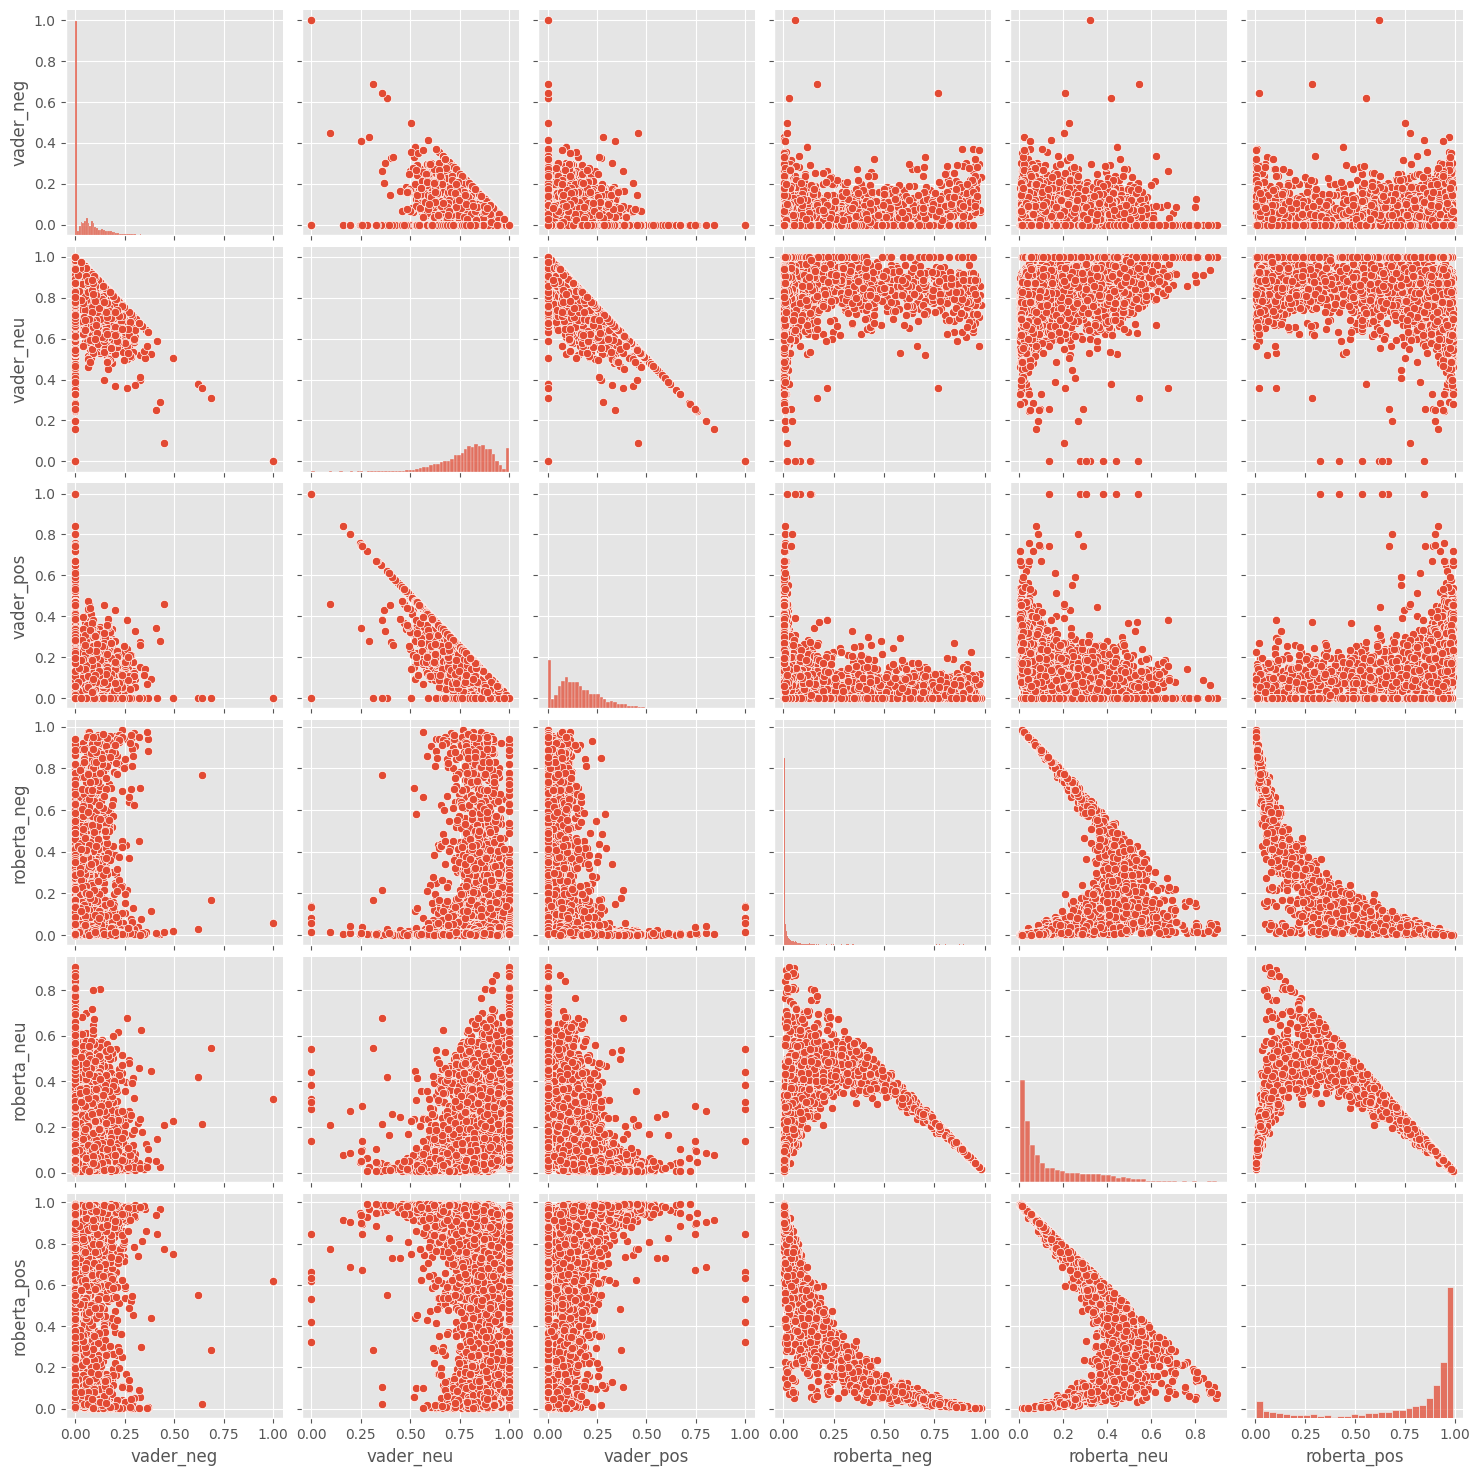

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results['roberta_neg'] = results['roberta_neg'].apply(lambda x: x.numpy())
results['roberta_neu'] = results['roberta_neu'].apply(lambda x: x.numpy())
results['roberta_pos'] = results['roberta_pos'].apply(lambda x: x.numpy())

data = results[['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']]

sns.pairplot(data=data)
plt.show()


In [60]:
results.query('overall == 1').sort_values('roberta_pos', ascending = False)

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,overall_encoded
4076,4091,0.0,0.822,0.178,0.6369,"tf.Tensor(0.010574726, shape=(), dtype=float32)","tf.Tensor(0.08804224, shape=(), dtype=float32)","tf.Tensor(0.9013831, shape=(), dtype=float32)",Scott,1.0,i returned to order a 11.6 laptop so i could h...,2014-08-05,125,0,2,2,-2,0.0,0.000000,0
1884,1890,0.109,0.792,0.099,-0.1548,"tf.Tensor(0.01582995, shape=(), dtype=float32)","tf.Tensor(0.08630456, shape=(), dtype=float32)","tf.Tensor(0.8978655, shape=(), dtype=float32)",gt,1.0,"i have zero complaints, this card does exactly...",2012-04-11,971,0,0,0,0,0.0,0.000000,0
3383,3395,0.0,0.91,0.09,0.8555,"tf.Tensor(0.06159583, shape=(), dtype=float32)","tf.Tensor(0.20729262, shape=(), dtype=float32)","tf.Tensor(0.73111147, shape=(), dtype=float32)",Neacsu Teodor,1.0,i can say that sandisk is one of the best comp...,2014-06-14,177,0,0,0,0,0.0,0.000000,0
1785,1791,0.047,0.754,0.199,0.9283,"tf.Tensor(0.07862707, shape=(), dtype=float32)","tf.Tensor(0.20088565, shape=(), dtype=float32)","tf.Tensor(0.7204873, shape=(), dtype=float32)",G. Evans,1.0,i didn't even have this card installed in my ...,2013-03-23,625,4,1,5,3,0.8,0.375535,0
173,177,0.0,0.863,0.137,0.8286,"tf.Tensor(0.06766955, shape=(), dtype=float32)","tf.Tensor(0.23700704, shape=(), dtype=float32)","tf.Tensor(0.6953235, shape=(), dtype=float32)","Amazon Customer ""Christian""",1.0,"i routinely use sdxc cards up to 128gb, and th...",2013-05-22,565,0,0,0,0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2385,0.296,0.704,0.0,-0.8777,"tf.Tensor(0.97183394, shape=(), dtype=float32)","tf.Tensor(0.025117103, shape=(), dtype=float32)","tf.Tensor(0.0030489326, shape=(), dtype=float32)",Joeyd1275,1.0,"im so upset right now it just died , turned on...",2012-11-20,748,0,0,0,0,0.0,0.000000,0
4829,4849,0.363,0.566,0.071,-0.8687,"tf.Tensor(0.97395307, shape=(), dtype=float32)","tf.Tensor(0.023063771, shape=(), dtype=float32)","tf.Tensor(0.0029832404, shape=(), dtype=float32)",W. Paul Lothary,1.0,died within 6 months! stopped being able to re...,2014-01-28,314,2,0,2,2,1.0,0.342380,0
2782,2789,0.219,0.781,0.0,-0.4215,"tf.Tensor(0.9611289, shape=(), dtype=float32)","tf.Tensor(0.035940386, shape=(), dtype=float32)","tf.Tensor(0.0029306987, shape=(), dtype=float32)",Lateef,1.0,"trash quality, broke and corrupted my data on ...",2014-01-07,335,0,0,0,0,0.0,0.000000,0
928,933,0.069,0.815,0.116,0.7569,"tf.Tensor(0.9748673, shape=(), dtype=float32)","tf.Tensor(0.022397606, shape=(), dtype=float32)","tf.Tensor(0.002735096, shape=(), dtype=float32)",Chris Belardinelli,1.0,i've only had this memory card for 3.5 weeks a...,2013-05-02,585,1,1,2,0,0.5,0.094531,0


In [48]:
results.query('overall == 1').sort_values('roberta_pos', ascending = False)['reviewText'].values[0]

'i returned to order a 11.6 laptop so i could have full operations than having a notebook. i am sure this is good quality as i have purchased san disk numerous times.'

In [49]:
results.query('overall == 5').sort_values('roberta_neg', ascending = False)['reviewText'].values[0]

'works! and why should i write more..... damn it! eleven more words... finally am done with this, crap!! three more words??'

In [52]:
results.query('overall == 1').sort_values('vader_pos', ascending = False)['reviewText'].values[0]

'crashed... lost everything... thanks sandisk.  used in gs4..not a solid product couple years worth of stuff gone in an instant.'

In [51]:
results.query('overall == 1').sort_values('vader_neg', ascending = False)['reviewText'].values[0]

'failed after a year!'